In [2]:
import pandas as pd

file_path = '/Users/mazinrafi/Downloads/Times Rankings 2024 - Sheet1.csv'
times_ranking_data = pd.read_csv(file_path)
times_ranking_data.head()

,Rank,Global Rank,Name\nCountry/Region,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,% Interdiscip. Science Research,Overall Score,Teaching Score,Research Environment Score,Research Quality Score,Industry Score,International Outlook Score
0,1,2,Stanford University,"14,517",6.4,23%,47 : 53,22%,98,99.0,97.8,99.6,100.0,87.0
1,2,3,Massachusetts Institute of Technology,"11,085",8.0,33%,41 : 59,40%,97.9,98.6,96.2,99.7,100.0,93.8
2,3,4,Harvard University,"20,050",9.0,25%,51 : 49,12%,97.8,97.7,99.9,99.4,84.2,90.8
3,4,6,Princeton University,"7,753",7.3,23%,47 : 53,43%,96.9,96.3,97.9,98.8,95.1,89.1
4,5,7,California Institute of Technology,"2,240",6.1,33%,37 : 63,49%,96.5,96.6,98.0,95.9,100.0,90.6


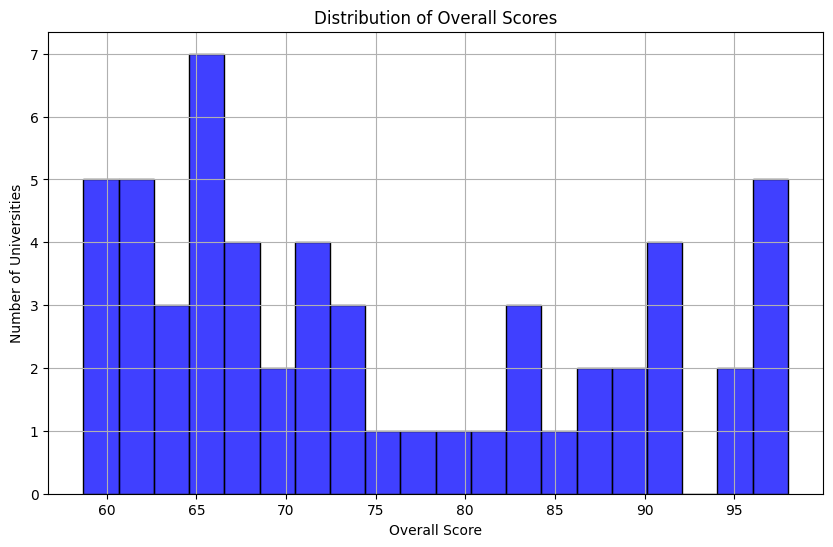

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
times_ranking_data['Overall Score'] = pd.to_numeric(times_ranking_data['Overall Score'], errors='coerce')

# Plotting the distribution of overall scores
plt.figure(figsize=(10, 6))
sns.histplot(times_ranking_data['Overall Score'], bins=20, kde=False, color='blue')
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Number of Universities')
plt.grid(True)
plt.show()

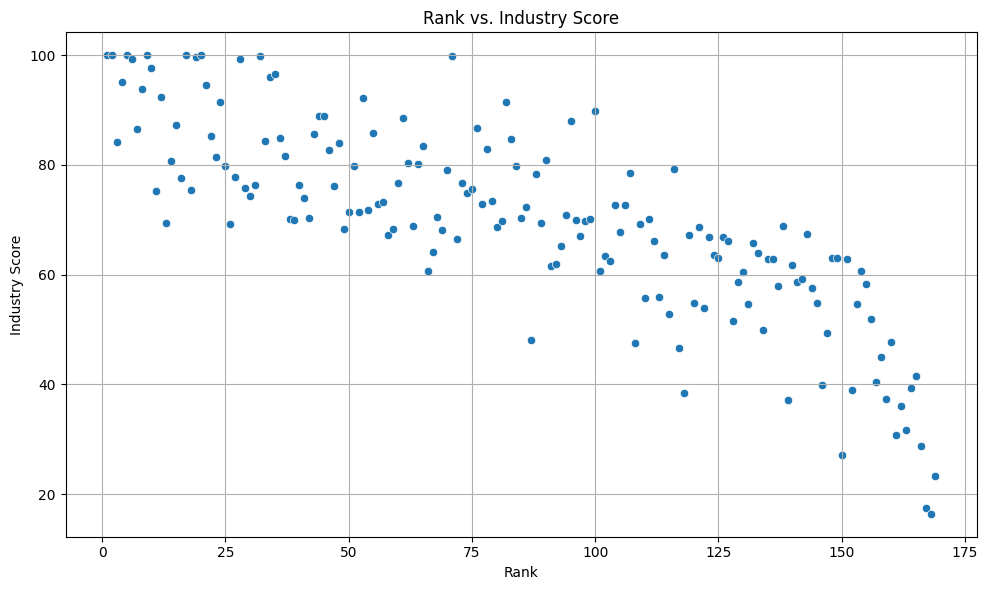

In [8]:
# Converting 'Industry Score' to numeric for visualization
times_ranking_data['Industry Score'] = pd.to_numeric(times_ranking_data['Industry Score'], errors='coerce')

# Ensuring 'Rank' is in the correct numeric format
times_ranking_data['Rank '] = pd.to_numeric(times_ranking_data['Rank '], errors='coerce')
# Re-plotting the relationship between the rank and the industry score, ensuring the 'Rank' column is used correctly
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank ', y='Industry Score', data=times_ranking_data)
plt.title('Rank vs. Industry Score')
plt.xlabel('Rank')
plt.ylabel('Industry Score')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make sure everything fits neatly
plt.show()

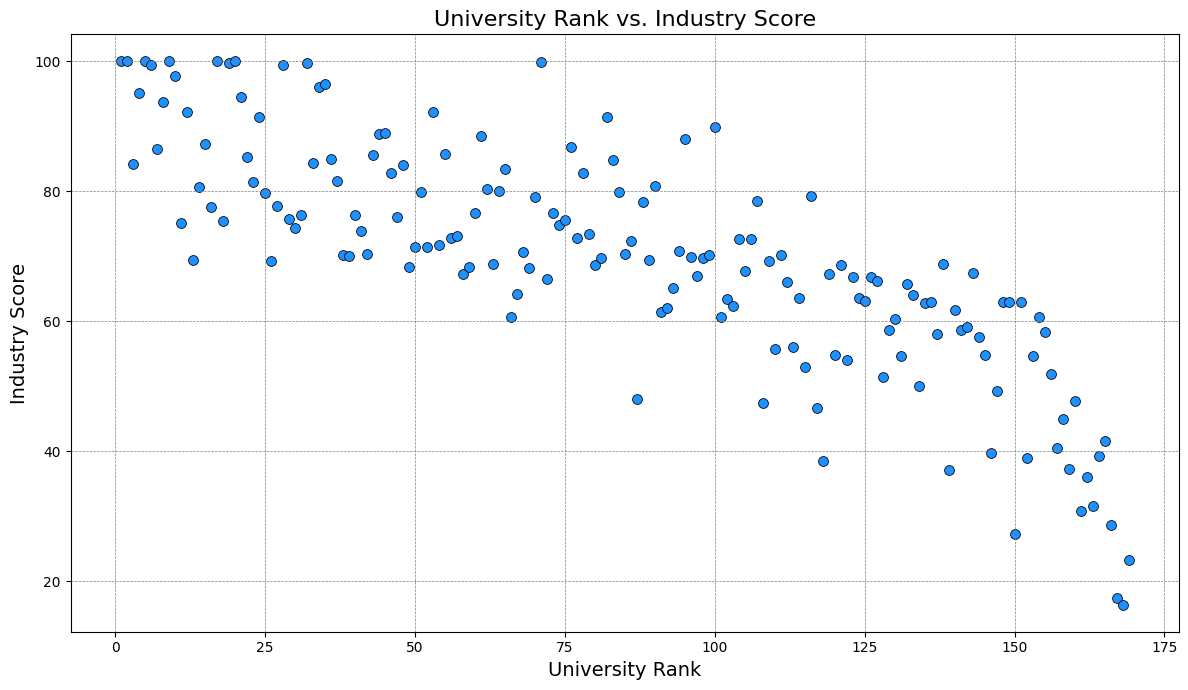

In [9]:
# Enhancing the plot for better aesthetics and readability
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Rank ', y='Industry Score', data=times_ranking_data, color='dodgerblue', edgecolor='black', s=50)

# Improving the title and labels
plt.title('University Rank vs. Industry Score', fontsize=16)
plt.xlabel('University Rank', fontsize=14)
plt.ylabel('Industry Score', fontsize=14)

# Refining the grid and layout
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()  # Adjust layout to make sure everything fits neatly

# Show the plot with enhancements
plt.show()

/Users/mazinrafi/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


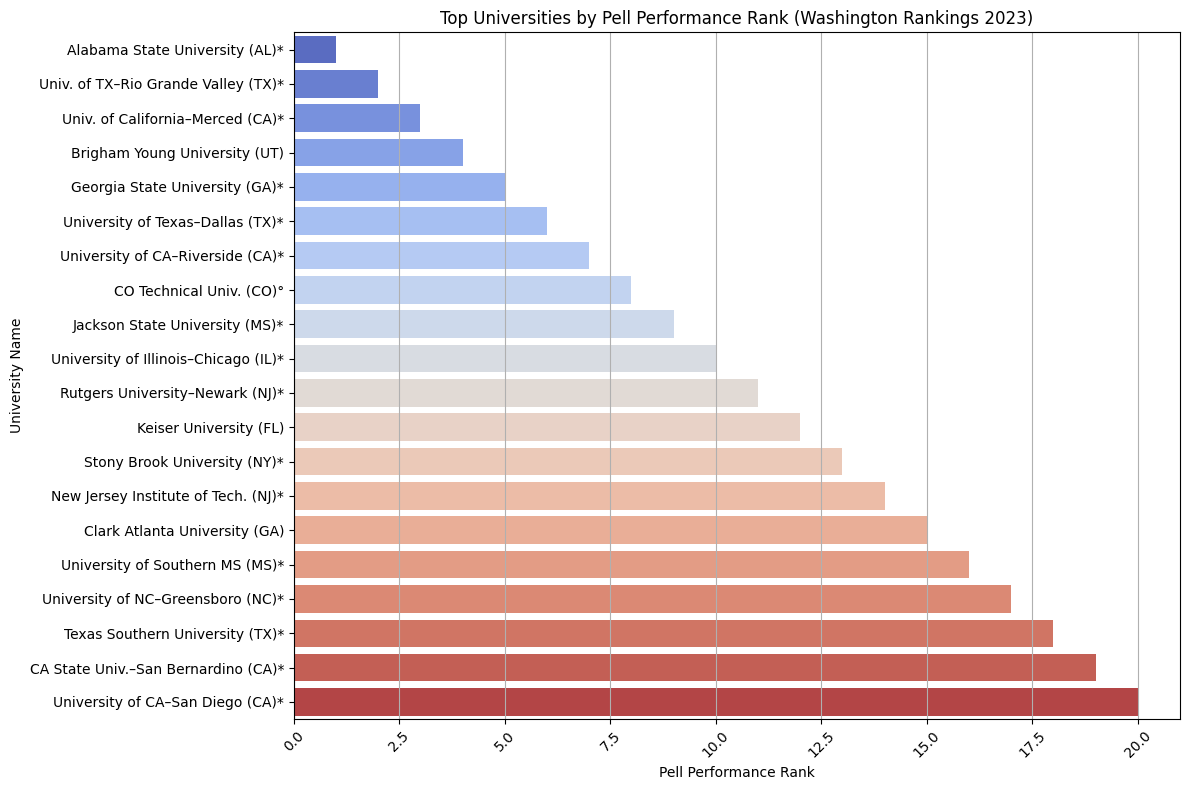

In [19]:
data_reloaded = pd.read_excel(file_path)

# Setting the first row as the header
data_corrected = data_reloaded.copy()
data_corrected.columns = data_corrected.iloc[0]  # Set the first row as column headers
data_corrected = data_corrected.drop(data_corrected.index[0])  # Drop the first row after setting it as headers

# Ensuring that the 'Pell performance rank' column is correctly identified and processed
data_corrected['Pell performance rank'] = pd.to_numeric(data_corrected['Pell performance rank'], errors='coerce')

# Sorting the data by Pell Performance Rank to get the top universities
top_pell_rank_universities = data_corrected.sort_values('Pell performance rank').head(20)

# Plotting the top universities based on Pell Performance Rank
plt.figure(figsize=(12, 8))
sns.barplot(x='Pell performance rank', y='Name', data=top_pell_rank_universities, palette='coolwarm')
plt.title('Top Universities by Pell Performance Rank (Washington Rankings 2023)')
plt.xlabel('Pell Performance Rank')
plt.ylabel('University Name')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

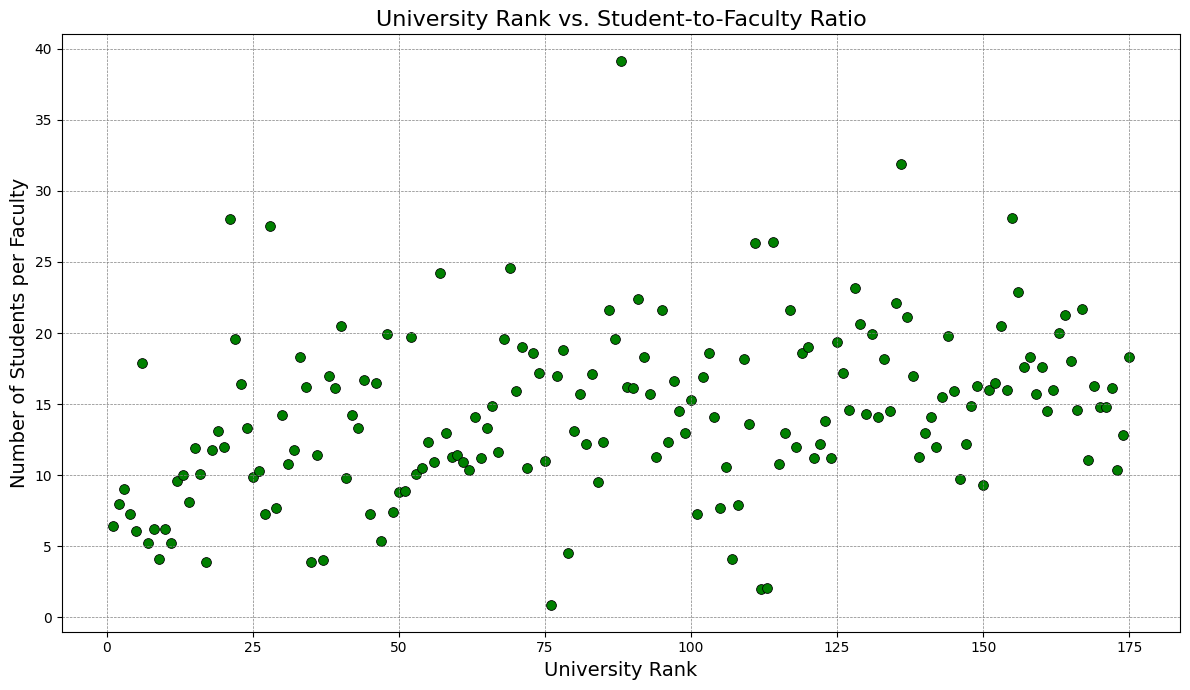

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Rank ', y='No. of students per staff', data=times_ranking_data, color='green', edgecolor='black', s=50)
plt.title('University Rank vs. Student-to-Faculty Ratio', fontsize=16)
plt.xlabel('University Rank', fontsize=14)
plt.ylabel('Number of Students per Faculty', fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()


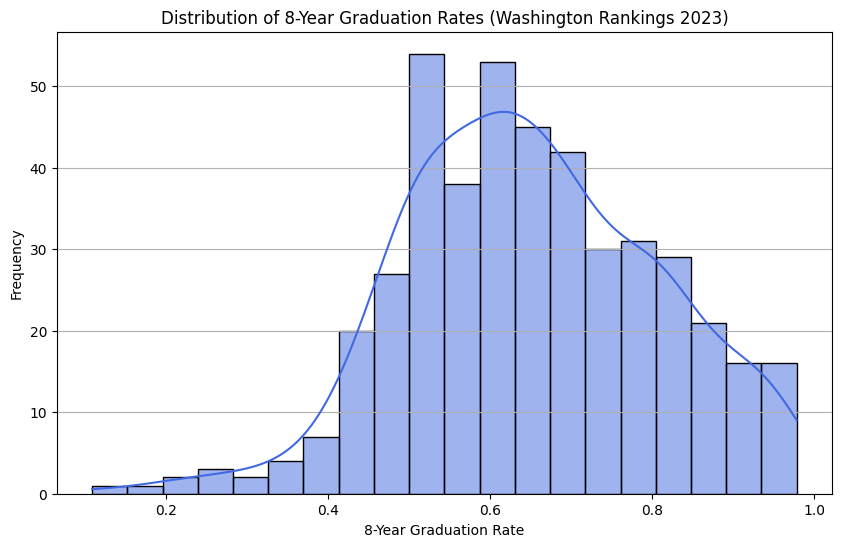

In [15]:
# Plotting the histogram for the distribution of 8-year graduation rates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['8-year graduation rate'].dropna(), bins=20, kde=True, color='royalblue')
plt.title('Distribution of 8-Year Graduation Rates (Washington Rankings 2023)')
plt.xlabel('8-Year Graduation Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

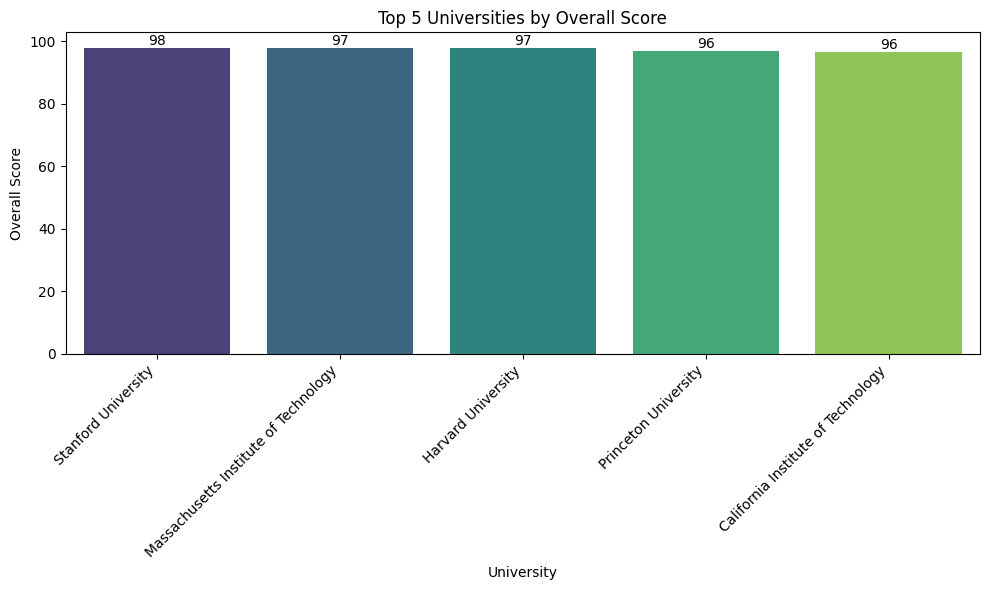

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'times_ranking_data' is your DataFrame and it's already loaded and preprocessed
top_5_universities = times_ranking_data.sort_values(by='Overall Score', ascending=False).head(5)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Name\nCountry/Region', y='Overall Score', data=top_5_universities, palette='viridis')

# Iterate over the bars and use the `text` function to add labels
for p in barplot.patches:
    barplot.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                 ha='center', va='bottom')

plt.title('Top 5 Universities by Overall Score')
plt.xlabel('University')
plt.ylabel('Overall Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

